In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
 from sklearn.preprocessing import StandardScaler
 from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [ ]:
type(california)

sklearn.utils._bunch.Bunch

In [ ]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
print(type(california.data), type(california.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
print(california.data.shape, california.target.shape)

(20640, 8) (20640,)


In [ ]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [ ]:
data_save = data
y = data['Price']
X = data.drop('Price', axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


In [ ]:
[print(k, v) for k, v in zip(X.columns, model.coef_)]

MedInc 0.4366932931343245
HouseAge 0.009435778033237972
AveRooms -0.10732204139090447
AveBedrms 0.645065693519812
Population -3.976389421211576e-06
AveOccup -0.003786542654971
Latitude -0.42131437752714385
Longitude -0.43451375467477743


[None, None, None, None, None, None, None, None]

In [ ]:
print("Intercept: \n", model.intercept_)

Intercept: 
 -36.94192020718441


In [ ]:
y_pred = model.predict(X)
print(y_pred[:5])

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]


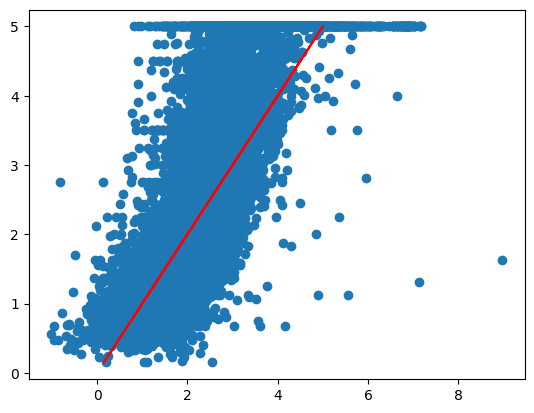

In [ ]:
plt.scatter(y_pred, y)
plt.plot(y, y, c = 'r')

In [ ]:
model.score(X, y)

0.606232685199805

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5).fit_transform(X)

In [ ]:
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

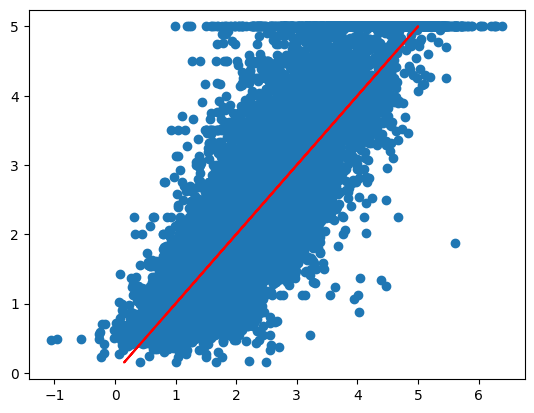

In [ ]:
plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')

In [ ]:
polynomial.score(poly, y)

0.7460745292501869

1. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

Можно посчитать корреляцию для каждого признка, с каждым признаком и с целевой переменной, узнаем зависимость между признаками и признаком и целевой переменной

In [ ]:
data_save.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [ ]:
import seaborn as sns

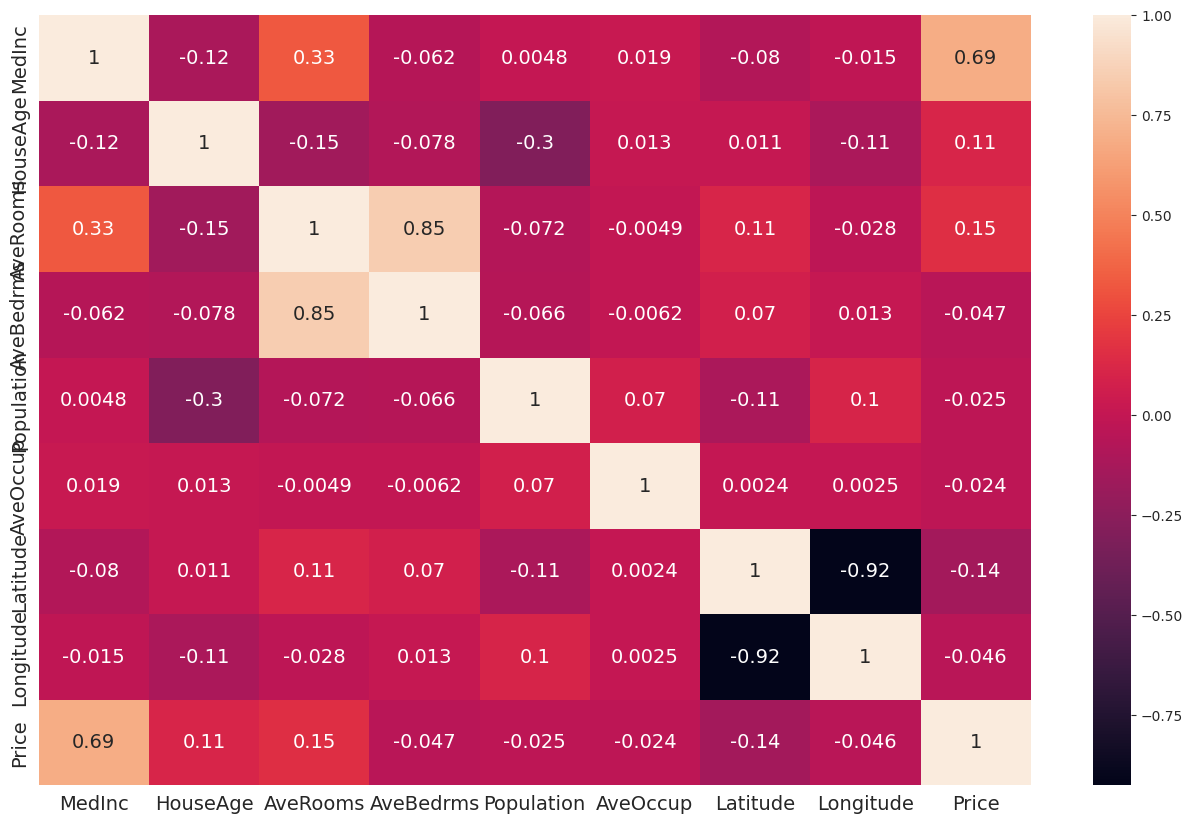

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(data_save.corr(), annot = True, annot_kws = {'size': 14})
sns.set_style('dark')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

Вывод:
1. Мультиколениарность у 2 параметров слишком большая -> один параметр можно объяснить через другой, что не очень хорошо, Также есть параметры которые имеют слишком низкую колениальность с ценой, что тоже не очень здорово.
2. Можно нормализировать параметры и залогорифмировать стоимость недвижемости -> повысится score

2. Попробуйте применить к той же задаче другие модели регрессии. Для каждой из них выведите визуализацию регрессии и оценку точности. Рекомендуется исследовать следующие модели:
Метод опорных векторов
Без ядра
С гауссовым ядром
С полиномиальным ядром
Метод ближайших соседей
Многослойный перцептрон
Дерево решений

In [ ]:
from sklearn.svm import SVR
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)

NameError: ignored

In [ ]:
#Без ядра
model_linear = SVR(kernel='linear')
model_linear.fit(x_train, y_train)
print(model_linear.score(x_test, y_test))

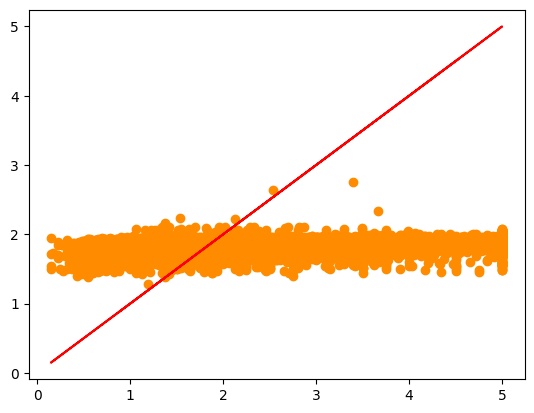

In [ ]:
#Гаусовское ядро
model_rbf = SVR(kernel='rbf')
model_rbf.fit(x_train, y_train)
y_pred = model_rbf.predict(X)
plt.scatter(y, y_pred, color='darkorange')
plt.plot(y, y, color='red')
plt.show()
print(model_rbf.score(x_test, y_test))

-0.021733540256988926


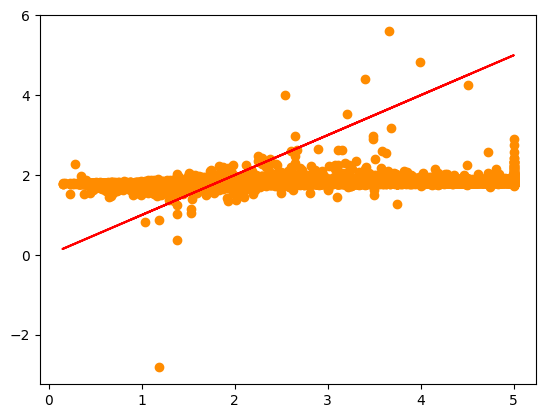

In [ ]:
#Полиномиальным ядром
model_poly = SVR(kernel='poly')
model_poly.fit(x_train, y_train)
print(model_poly.score(x_test, y_test))
y_pred = model_poly.predict(X)
plt.scatter(y, y_pred, color='darkorange')
plt.plot(y, y, color='red')
plt.show()

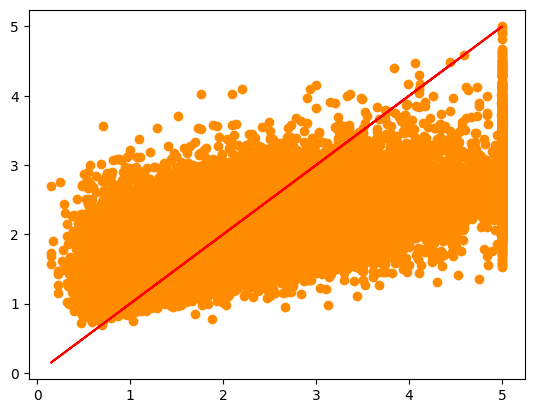

0.1785663449910856


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)

model = KNeighborsRegressor(n_neighbors = 7, weights = 'uniform')
model.fit(x_train, y_train)
model.score(x_test, y_test)
y_pred = model.predict(X)
plt.scatter(y, y_pred, color='darkorange')
plt.plot(y, y, color='red')
plt.show()
print(model.score(x_test, y_test))

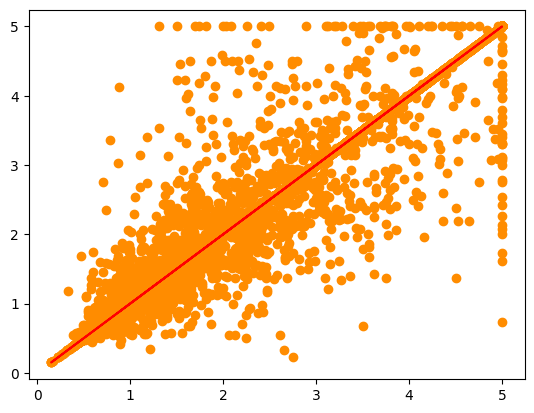

-0.021733540256988926


In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(X)
plt.scatter(y, y_pred, color='darkorange')
plt.plot(y, y, color='red')
plt.show()
print(model_poly.score(x_test, y_test))

3. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [ ]:
def obushalka(X, y):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)
  coefs = []
  model = SVR(kernel='rbf')
  model.fit(x_train, y_train)
  coefs.append(model.score(x_test, y_test))

  model_poly = SVR(kernel='poly')
  model_poly.fit(x_train, y_train)
  coefs.append(model_poly.score(x_test, y_test))

  model = KNeighborsRegressor(n_neighbors = 7, weights = 'uniform')
  model.fit(x_train, y_train)
  coefs.append(model.score(x_test, y_test))

  model = DecisionTreeRegressor()
  model.fit(x_train, y_train)
  coefs.append(model.score(x_test, y_test))

  return coefs

In [ ]:
print(obushalka(X, y))

[-0.012143973373612171, -0.021733540256988926, 0.1785663449910856, 0.602642961543798]


4. Повторите полностью анализ для другого набора данных - встроенного в sklearn датасета diabetes.

In [ ]:
from sklearn import datasets

In [ ]:
diabetes = datasets.load_diabetes(as_frame=True)

In [ ]:
X = diabetes.data
y = diabetes.target

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 442 entries, 0 to 441
Series name: target
Non-Null Count  Dtype  
--------------  -----  
442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


Не требуется обработка нулевых значений - подставляем этот датасет и выполняем его!